# Recap Cours Machine learning

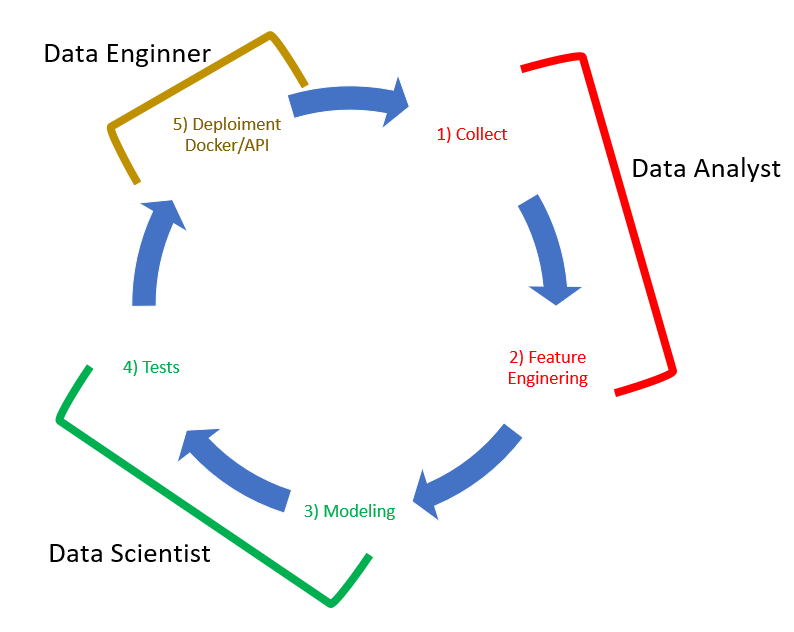

Ce schéma résume le cours de Machine learning. Dans ce cours, nous allons voir chaque étape de ce schéma. A la fin, on devrait être capable de faire une API docker allant intéroger un algorithme preentrainé. 

<b> A noter que seul les étapes 1, 2, 3 et 4 ont été abordées en cours. </b>

## Les librairies

In [77]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

# 1) Collect
Dans cette étape, nous allons collecter des données. Il faut parfois savoir convertir un fichier (Excel par exemple) en CSV pour pouvoir ensuite faire du feature engineering 

### Les types de variables :

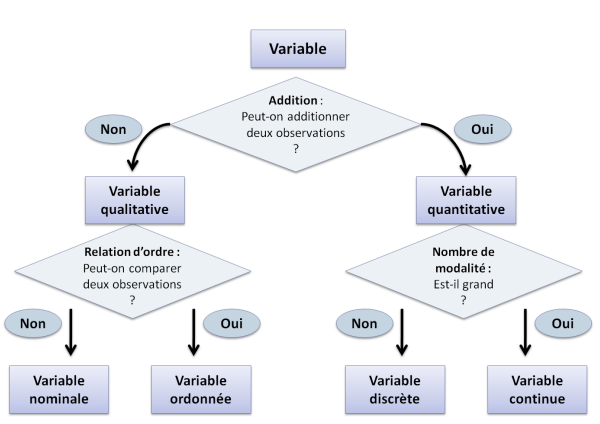


Les <b>variables qualitatives (ou catégorielles)</b> mesurent juste des “états”, des catégories. Il n’y a pas d’échelle de valeurs :

Les <b>variables nominales</b> présentent des catégories que l’on nomme avec un nom. Par exemple : homme ou femme, le nom de la voiture, une couleur. Le seul calcul faisable sur les variables nominales est le nombre d’éléments par catégorie.

Les <b>variables ordonnées</b> sont des catégories qui sont naturellement ordonnées. Ça peut être le classement à une course. Il faut prendre en compte qu’un même intervalle de “1” n’a pas toujours la même signification. Arrivé 1er ou 2éme à une course n’a pas la même signification qu’arrivé 1526 ou 1527éme !

<br>

Une <b>variable quantitative</b> peut être discrète ou continue :

Une <b>variable discrète</b> a une valeur finie. Il est possible de les énumérer (” 1, 2, 3,…”). 

Une <b>variable continue</b> peut prendre, en théorie, une infinité des valeurs, formant un ensemble continu. Par exemple, le temps de réussite d’une tache sera compris entre 0 et 300 secondes, et pourra prendre les valeurs 12,235689 ou 12,235699999.

<br><br>
<b>Chaque type de variable a sa façon d'être schématisée.</b>

### Resumé des commandes :

In [78]:
# Je met un if 0 pour que les commandes dans le if ne soient pas exécutés
if 0:

    #Importer un CSV avec Pandas
    DataFrame = pd.read_csv('data/Fichier.csv') 
    #Importer un CSV avec un problème d'encodage en UTF8 avec Pandas 
    DataFrame = pd.read_csv('data/Fichier.csv', encoding = "ISO-8859-1", engine='python')
    #Importer un CSV en précisant le séparateur
    DataFrame = pd.read_csv('data/DataFrame.csv',sep=';')
    #Importer un dataset inclu dans seaborn
    iris = sns.load_dataset('iris')

    #Affiche les 10 premières lignes
    DataFrame.head()
    #Affiche les n premières lignes
    DataFrame.head(n)

    #Information sur les colonnes du dataframe
    DataFrame.info()
    #Info sur les noms et les types des colonnes
    DataFrame.dtypes
    
    #Avoir le type de la variable iris
    type(iris)
    #Retourne chaque valeur que peux prendre une colonne
    iris['colonne'].unique()
    #Retourne le nombre de valeur que peux prendre la colonne
    iris['colonne'].nunique()
    #Retourne un index de valeur que peux prendre la variable catégorique colonne
    iris['colonne'].astype('category').cat.categories

### Exemple :

In [79]:
iris = sns.load_dataset('iris')

In [80]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [81]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [82]:
type(iris)

pandas.core.frame.DataFrame

In [83]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [84]:
iris['species'].nunique()

3

# 2) Feature engineering

Maintenant que nos données sont importées, on vas les triées, les étudiées et récupérer les données que l'on trouve utile. Chaque type de variable a sa façon d'être affichée.

Le but est de trouver des features permettant de prédire une target. 

Dans notre cas, la target est species (on veux prédire species) et nos features sont sepal_length, sepal_with, petal_length et petal_width.  

Il n'est pas obligatoire que toute les données restantes après la séparation de la target soient des features. Pour définir quel sont nos features, on doit faire un paiplot ou une heatmap de la matrice de coorélation. 

In [85]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## Resumé des commandes :

In [86]:
if 0:
    # C'est deux lignes permettent d'agrandir le schéma
    fig = mp.pyplot.gcf()
    fig.set_size_inches(20,6)

    # Ajouter un titre
    plt.title("titre")
    
    #Ajouter des labels
    plt.xlabel('nom des écuries') 
    plt.ylabel('Point sur la saison') 
    
    #Quand il y a beaucoup de données, faire un échantillonage est utile. Le sample prend un échantillon de 50 cas du Dataframe
    iris.sample(50)
    #Enleve les lignes comportants au moins une donnée en Not A Number
    iris.dropna()
    iris.iloc[:,[2,7]]
    iris.describe()
    
    #Remplacer un caractère dans une colonne et le transformer en float
    iris["sepal_width"].str.replace(',','.').astype(float)

    #Exemple de query où l'on utilise un ou
    query('(feature1 < 1 and feature2 < 3) or (feature1 > 2 and feature2 > 4)')
    
    #Masque avec un ou
    data[ ( (data['feature1']<1) & (data['feature2']<3) ) | ( (data['feature1']>2) & (data['feature2']>4) ) ]

## Variable qualitative (catégorielle)

Les possibilités pour afficher des données qualitatives (catégorielles) sont limitées. On ne peux qu'utiliser le nombre de valeur dans l'ensemble des valeurs (ce que l'on appelle la fréquence en statistique) et la fréquence en pourcentage.

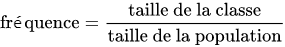

Exemple : 10 personne sur 15 sont des hommes donc  fréquence = 10/15

### Traitement des données

In [87]:
vocabulaire = iris['species'].astype('category').cat.categories

#Ici, on vas créer un dictionnaire qui prendra v qui est l'espèce et lui associera la nombre de fois qu'il apparait dans notre dataframe 
ListSPECIES_COUNTBYTYPE = {v:iris.query("species == '" + v + "'")['species'].count() for i,v in enumerate(vocabulaire.tolist())}
ListSPECIES_COUNTBYTYPE

{'setosa': 50, 'versicolor': 50, 'virginica': 50}

In [88]:
#Un dictionnaire permet d'associer une valeur v à une clef k
#Un exemple de récupération de toute les valeurs d'un dictionnaire
COUNTBYTYPE = []
for k,v in ListSPECIES_COUNTBYTYPE.items():
    COUNTBYTYPE.append(v)
COUNTBYTYPE

[50, 50, 50]

### Diagramme en barre

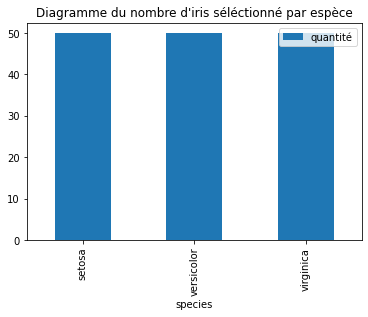

In [89]:
#Ne jamais oublier de mettre un titre et la signification de x et y
Data = {'species': list(ListSPECIES_COUNTBYTYPE),
        'quantité': COUNTBYTYPE
       }
  
df = pd.DataFrame(Data,columns=['species','quantité'])
df.plot(x ='species', y='quantité', kind = 'bar')
plt.title("Diagramme du nombre d'iris séléctionné par espèce")
plt.show()

### Diagramme circulaire

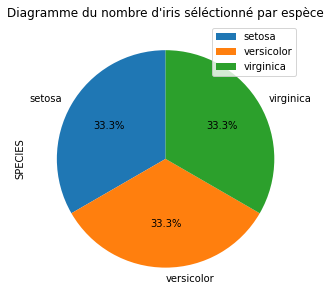

In [90]:
Data = {'SPECIES': COUNTBYTYPE}
df = pd.DataFrame(Data,columns=['SPECIES'],index = list(ListSPECIES_COUNTBYTYPE))

df.plot.pie(y='SPECIES',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.title("Diagramme du nombre d'iris séléctionné par espèce")
plt.show()

### Transformation des données

Souvent, les donnéees qualitative (catégorielle) ne peuvent pas être exploités par les algorithmes de machine learning car elles sont des Str. Pour cela, il faut les transformer en nombre si l'on veux les utiliser en temps que features.

Dans le cas d'une variable ordonnée, remplacer les champs par des chiffres à un sens. Donc on peux le faire car ce sont des données ayant un rang. 

Exemple : la donnée mauvais peux être remplacé par -1, la donnée indifférent peux être remplacé par 0 et la donnée excellente peux être remplacé par 1

In [91]:
#Species n'est pas une variable ordonnée mais pour l'exemple, on l'utilisera
iris.species.map(dict(setosa=2, versicolor=1, virginica=0))

0      2
1      2
2      2
3      2
4      2
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64

Dans le cas d'une variable nominale, remplacer une donnée par un chiffre n'a pas de sens. 

Exemple : remplacer femme par 1 et homme par 2 n'a pas de sens. Même si 2>1 est vrai, homme>femme n'a pas de sens.

Pour palier cela, on va créer deux colonnes, une femme et une homme. Lorsque la donnée sera femme, la colonne femme sera à 1 et homme à 0. Et lorsque la donnée sera homme, la colonne femme sera à 0 et femme à 1.

In [92]:
pd.get_dummies(iris, columns=['species'])

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## Merge de plusieurs Dataframe

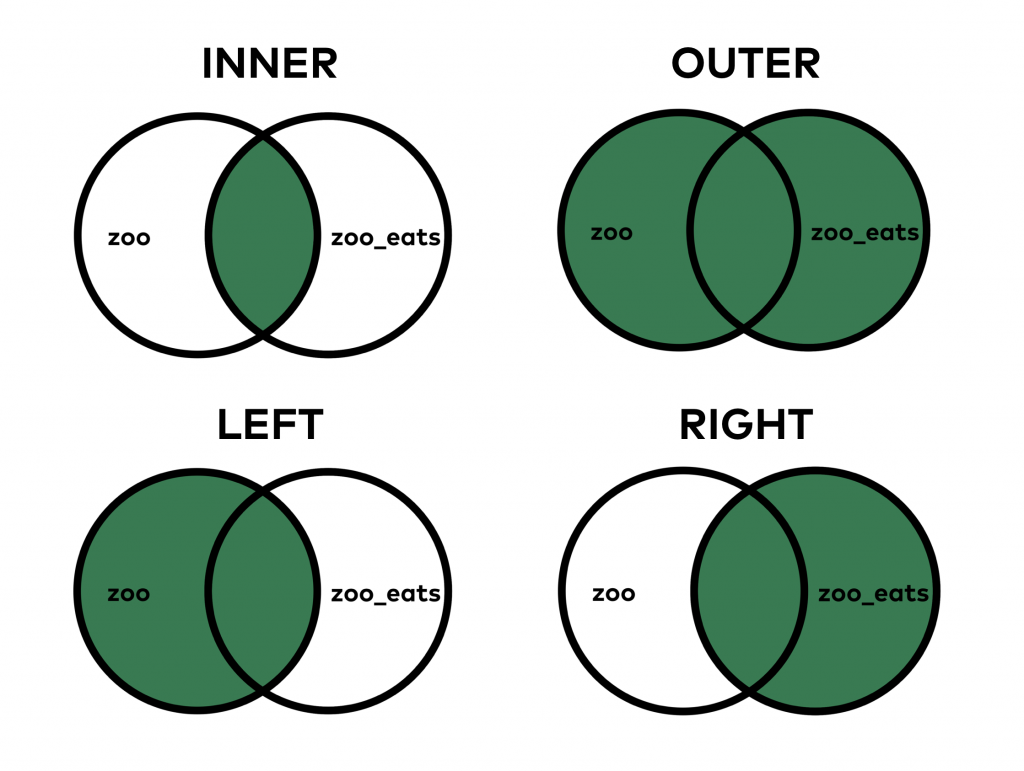

In [93]:
# Exemple de merge
if 0:
    pd.merge(dataframe1,dataframe2,on = "id",how='inner')

## Choisir ces variables

Lorsque l'on cherche deux colonnes corrélé entre elles, on fait une heatmap de la matrice de corrélation (iris.corr()). Deux colonnes peuvents être corrélé, inversement corrélé ou pas corrélé. 

Plus la corrélation entre 2 variables est forte, plus la valeur s'approche de 1. 

Plus la coorélation entre 2 variables est en fortement inversement corrélé, plus la valeur s'approche de -1. 

Ce qui nous interesse, c'est de trouver deux variables fortement coorélé ou inversement corrélé.

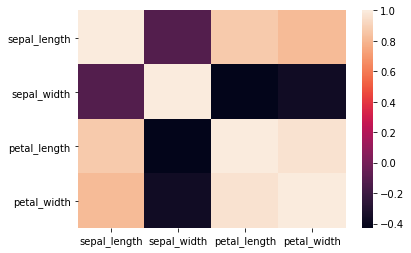

In [94]:
g = sns.heatmap(iris.corr())

## Variable quantitative

Pour des variables quantitative, tous type de graphique est possible. Le principale est de comprendre comment filtrer les données pour ne récuperer que ce qui nous interesse. 

### Les masques (filtrer les colonnes)

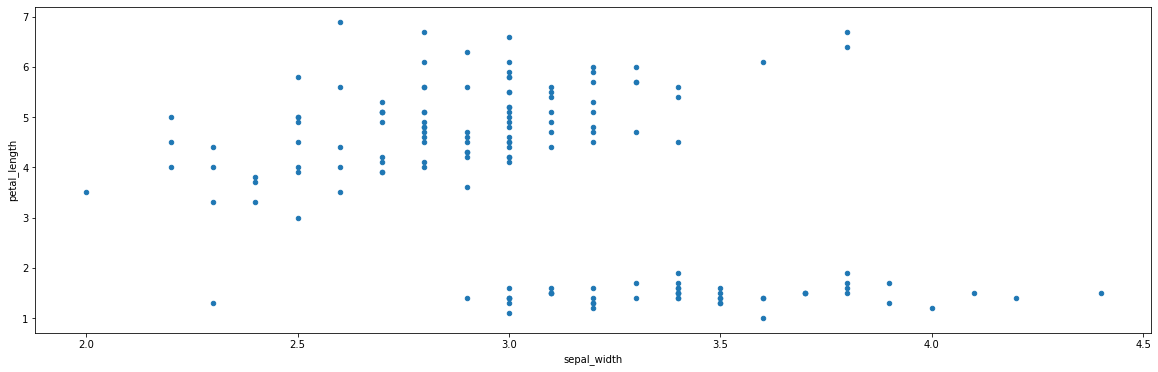

In [95]:
iris.plot.scatter(x='sepal_width', y='petal_length')
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

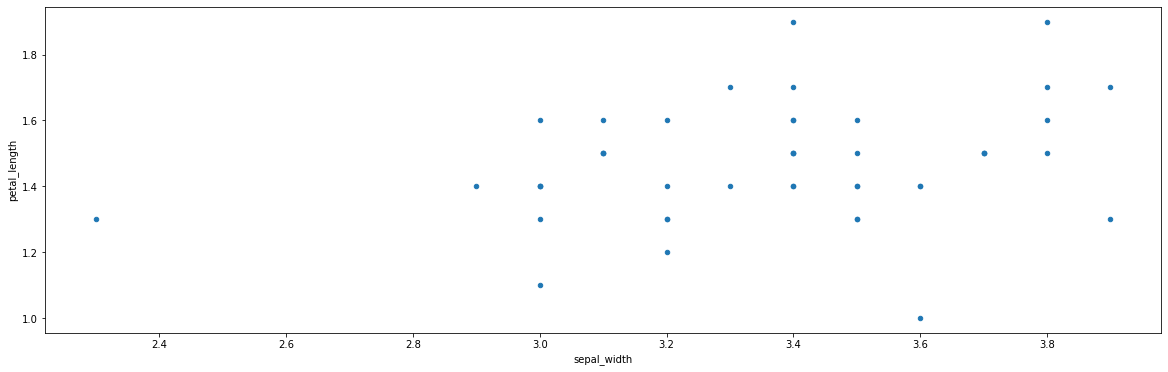

In [96]:
iris[(iris['sepal_width'] < 4) & (iris['petal_length'] < 2.5)].plot.scatter(x='sepal_width', y='petal_length')
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

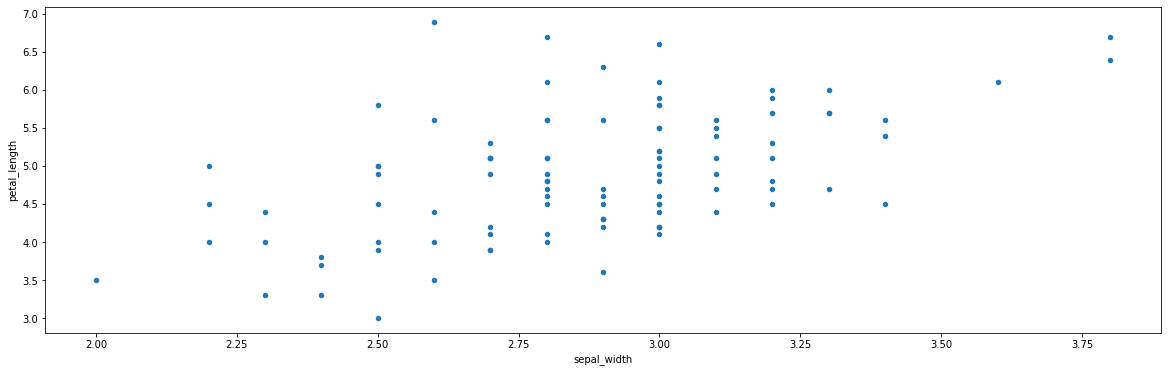

In [97]:
iris.query('sepal_width < 4 and petal_length > 2').plot.scatter(x='sepal_width', y='petal_length')
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

### Boite à moustache

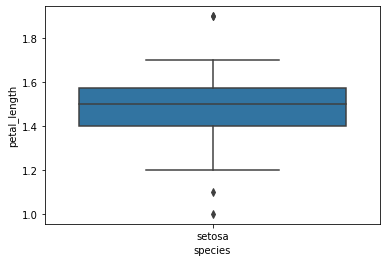

In [98]:
g = sns.boxplot(x="species", y="petal_length", data=iris.query('species == "setosa"'))

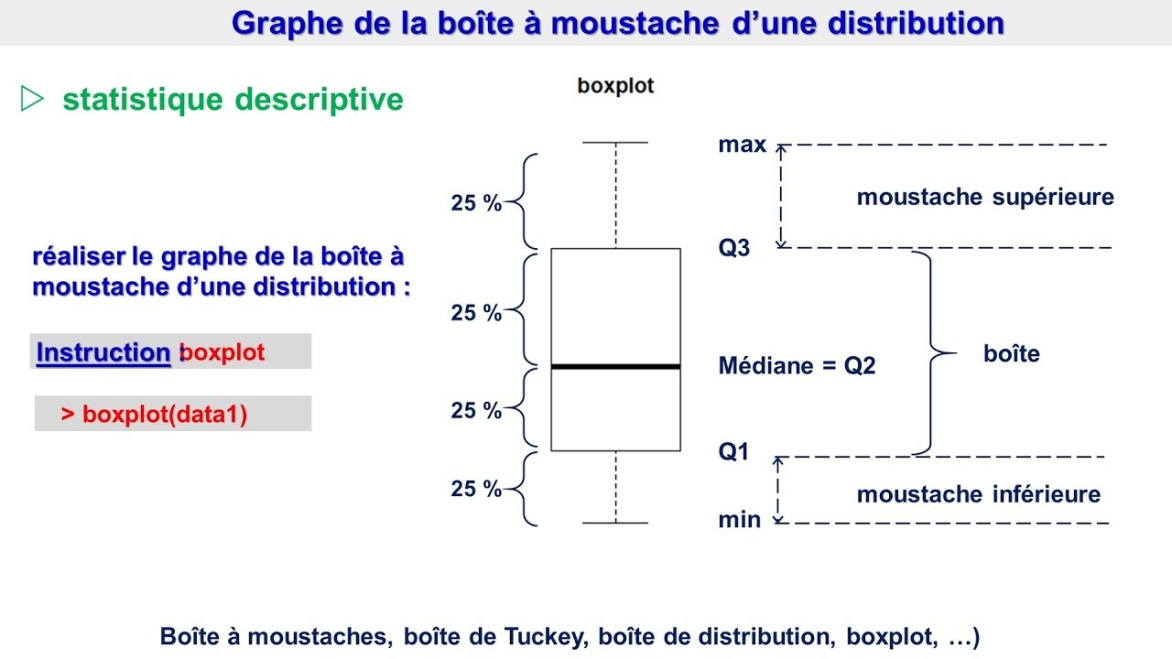

Les points sont les valeurs abérrantes. Pour avoir une analyse plus précise, dans certain cas, il faut supprimer les valeurs abérrantes en utilisant les masques. A noter que 50% des valeurs se trouve dans le rectangle.

## Choisir les variables à utliser pour notre Target

Pour choisir ces variables, on peut aussi utiliser pairplot pour visualiser une target en fonction des différentes colonnes restantes. Puisque l'on cherche à prédire species, on vas chercher des features permettent de séparer les différentes valeurs de la target. 

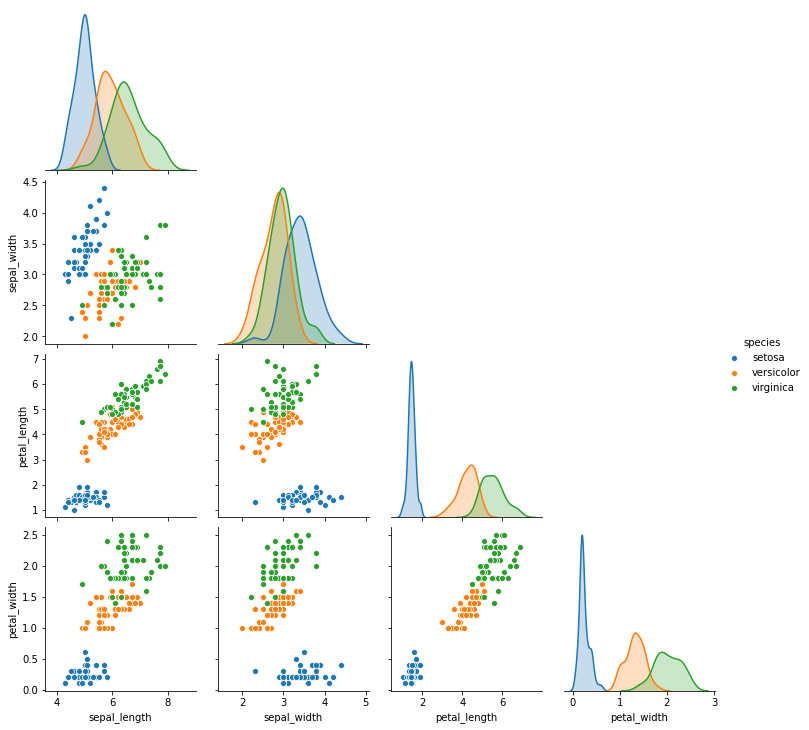

In [99]:
# On veux visualier species, notre target, en fonction des features
sns.pairplot(iris, hue='species', corner=True)

On remarque que le l'espèce virginica et versicolor ne peuvent pas être différenciées en utilisant la comparaison de sepal_width et sepal_length 

In [100]:
# On récupère nos features en X et notre target en Y
X = iris.drop('species', axis='columns')
Y = iris['species'].astype('category')

In [101]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [103]:
#Le nombre de données de X doit toujours être égale à celle de Y
X.shape , Y.shape

((150, 4), (150,))

In [104]:
classes = Y.astype('category').cat.categories.tolist()

# 3) Modeling

Nous avons maintenant notre target Y et nos features X. On vas maintenant séparer nos data en data de train (d'entrainement) et en data de test (pour tester notre algorithme)

In [105]:
from sklearn.model_selection import train_test_split

#stratify permet de prendre un échantillon représentatif de valeur pour le train
#random_state permet de prendre les données de manière random
#train_size permet de définir la taille du nombre de données pris pour l'entrainement 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, stratify=Y,random_state=2)

In [106]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((45, 4), (105, 4), (45,), (105,))

## Entrainement de différent Algorithme

Maintenant, on doit entrainer notre algorithme. Il exitent une multitude d'algorithme dans la librairie Sklearn. Dans le cours, nous avons vues 2 types d'algorithmes. Les algorithmes de classification et de Regression. Les algorithmes de classifications permettent de prédire la classification d'un objet. Et les algorithmes de Regression permettent de predire une valeur en fonction de données continue.

On trouvera les différents algorithmes sur le site de sklearn https://scikit-learn.org/stable/index.html

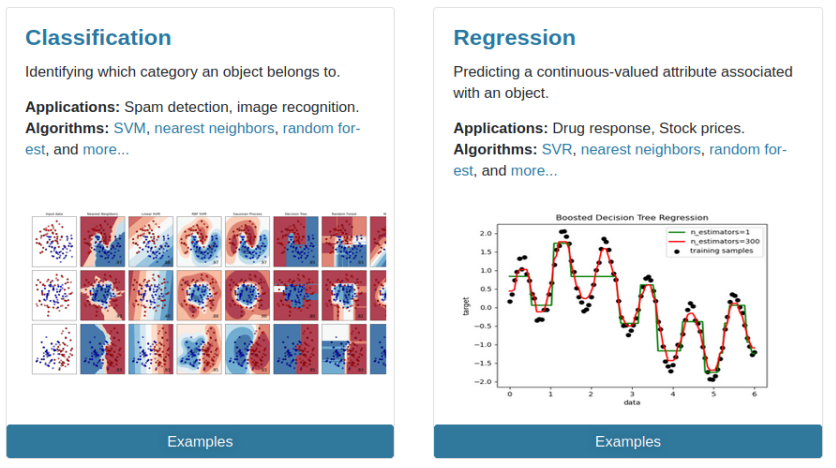

### Explication du fonctionnement des algo de Classification

En utilisant paiplot, on peux remarquer que certaine données peuvent définir la target que l'on cherche.

<AxesSubplot:xlabel='X0', ylabel='X1'>

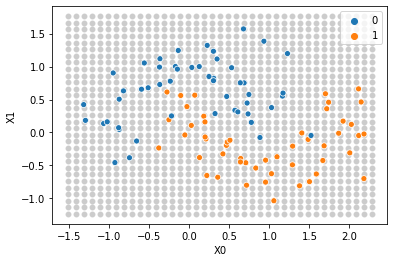

In [107]:
from sklearn.datasets import make_moons
def plage_de_valeur(df,col,b=0.2):
    # b : bordure
    min = df[col].min() - b
    max = df[col].max() + b
    return (min, max)
X, Y = make_moons(random_state=0,noise=0.3)
df_moon = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'Y':Y})
X0_range = np.arange(*plage_de_valeur(df_moon, 'X0'),0.1)
X1_range = np.arange(*plage_de_valeur(df_moon, 'X1'),0.1)
# démeler le maillage
X0_mesh, X1_mesh = np.meshgrid(X0_range,X1_range)
X0_mesh, X1_mesh = X0_mesh.ravel(), X1_mesh.ravel()
mesh_df = pd.DataFrame({"X0": X0_mesh,"X1": X1_mesh})
sns.scatterplot(X0_mesh, X1_mesh,color='black', alpha=0.2);
sns.scatterplot(df_moon['X0'],df_moon['X1'], hue=df_moon['Y'].tolist())

Voici un exemple de donnée où l'on pourra utiliser un algorithme de Classification pour savoir si une valeur X à une proba plus élevé d'être bleu ou orange.

### Entrainement de l'Algorithme KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [109]:
#C'est un algorithme de prédiction des résultats via les K voisin
knn = KNN(n_neighbors=3)
knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

### Entrainement de l'Algorithme SVC

In [110]:
from sklearn.svm import SVC

In [111]:
svc = SVC(gamma='auto')
svcTrained = svc.fit(X_train,Y_train)

### Entrainement de l'Algorithme Regression logistique

In [112]:
from sklearn.linear_model import LogisticRegression as LR

In [113]:
lr = LR(max_iter=10000)
lrTrained = lr.fit(X_train,Y_train)

## Comment choisir l'algorithme ?

### Tester plusieurs algorithmes

In [114]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_details = [('pca',PCA()),('knn',KNN())]

hyperparameters = {}
hyperparameters['pca__n_components'] = list(range(1,64+1,3)) ## ex : clef puis __ puis random_state
hyperparameters['knn__n_neighbors'] = [1, 3, 5, 9, 21]

pipeline = Pipeline(pipeline_details)
    
hyperparameter_search = GridSearchCV(pipeline,hyperparameters , scoring='accuracy', cv=5) # 5*20*5 = 500 pour un dataset de 1000 lignes
hyperparameter_search.fit(X_train,Y_train)
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

Meilleur score : 0.95556
Meilleur paramètres : {'knn__n_neighbors': 1, 'pca__n_components': 4}


# 4) Tests

Maintenant, on as entrainé des algorithmes. On va tester ces algorithmes avec nos données de tests. Il existent différentes mesures des performances d'un algorithme. ici, on va utiliser l'accuracy

## Accuracy

In [115]:
def accuracy(preds, Y):
    return (preds == Y).sum() / len(Y)

In [116]:
#On utilise notre algo knn avec nos données de test pour prédire le résultat 
Y_pred = knn.predict(X_test)
#On test le résultat en comparant le Y prédit au Y de test
accuracy(Y_pred,Y_test)

0.9428571428571428

## Matrice de confusion

In [117]:
from sklearn.metrics import confusion_matrix
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

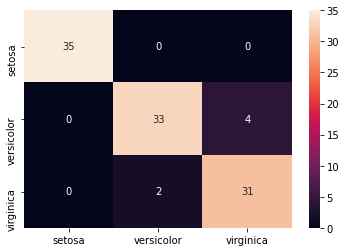

Accuracy : 0.9428571428571428


In [118]:

cm_train = confusion_matrix(Y_pred, Y_test, labels=classes)
show_cm(cm_train, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(Y_pred, Y_test)))